In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import random
import datetime
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#URLs of the three CSVs
properties_url = r'/Users/santwana/Documents/Fall2017/DSF/HW2/properties_2016.csv'
train_url = r'/Users/santwana/Documents/Fall2017/DSF/HW2/train_2016_v2.csv'
sample_url = r'/Users/santwana/Documents/Fall2017/DSF/HW2/sample_submission.csv'

In [136]:
ds_train = pd.read_csv(train_url)
dataframe_train = pd.read_csv(train_url, low_memory = False)
dataframe_properties = pd.read_csv(properties_url, low_memory = False)

print(dataframe_train.head(10))
#print(dataframe_properties.head(10))



   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
5  11509835   -0.2705      2016-01-02
6  12286022    0.0440      2016-01-02
7  17177301    0.1638      2016-01-02
8  14739064   -0.0030      2016-01-02
9  14677559    0.0843      2016-01-03


In [137]:
dataframe_train = pd.merge( dataframe_train , dataframe_properties, how ='left', on = 'parcelid')


color = sns.color_palette("hls", 8)

mean = dataframe_train.mean()

df_train1 = dataframe_train.fillna(mean, inplace = True)


In [138]:

values = []
tags = []
for column in columns_x_axis:
    tags.append(column)
    values.append(np.corrcoef(df_train1[column].values, df_train1.logerror.values)[0, 1])
    
my_corr = pd.DataFrame({'col_tags' : tags, 'corr_values' : values})

my_corr = my_corr.sort_values(by = 'corr_values')
my_corr_cols = ['assessmentyear', 'rawcensustractandblock', 'taxamount', 'lotsizesquarefeet', 'landtaxvaluedollarcnt', 'regionidcity']

corr_method = dataframe_train.corr( method = 'pearson')
f, ax = plt.subplots(figsize = (12, 12))
# print(corr_method)
minimum = corr_method.min()
maximum = corr_method.max()
min = minimum.min()
max = maximum.max()
print(" min corr : " ,min)
print(" max corr : " ,max)


/Users/santwana/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/santwana/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


 min corr :  -0.637564917276
 max corr :  1.0


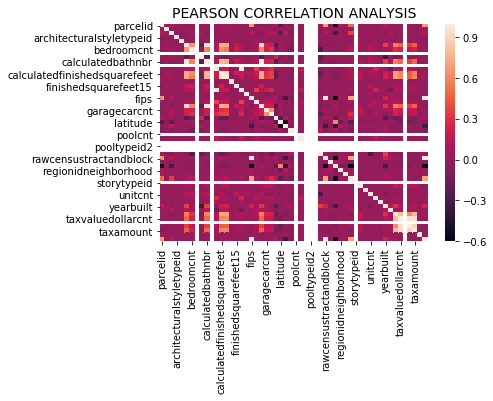

In [140]:


plt.title("PEARSON CORRELATION ANALYSIS", fontsize = 14)
sns.heatmap(corr_method, vmin = -0.6, vmax = 1)
plt.show()


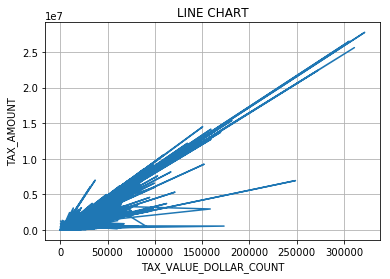

In [143]:
from pylab import *
t = dataframe_train.taxamount.values
s = dataframe_train.taxvaluedollarcnt.values
plot(t, s)
 
xlabel('TAX_VALUE_DOLLAR_COUNT')
ylabel('TAX_AMOUNT')
title('LINE CHART')
grid(True)
show()




 SCATTER PLOT


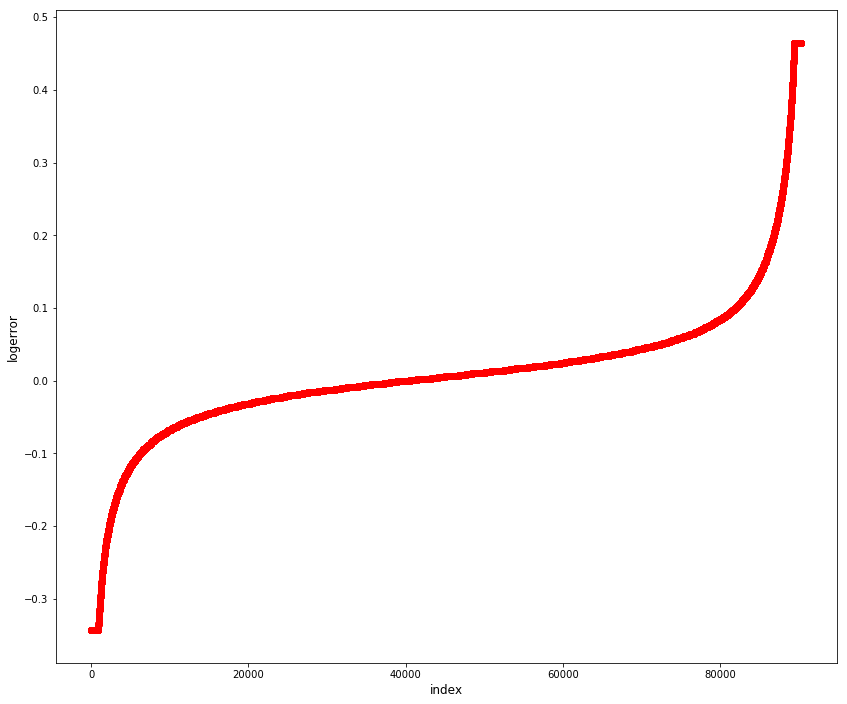

In [147]:


print("\n\n SCATTER PLOT")
plt.figure(figsize=(14, 12))
plt.scatter(range(dataframe_train.shape[0]), np.sort(dataframe_train.logerror.values),color = "red")
plt.xlabel('index', fontsize = 12)
plt.ylabel('log_error', fontsize = 12)
plt.show()



 
 HISTOGRAM 


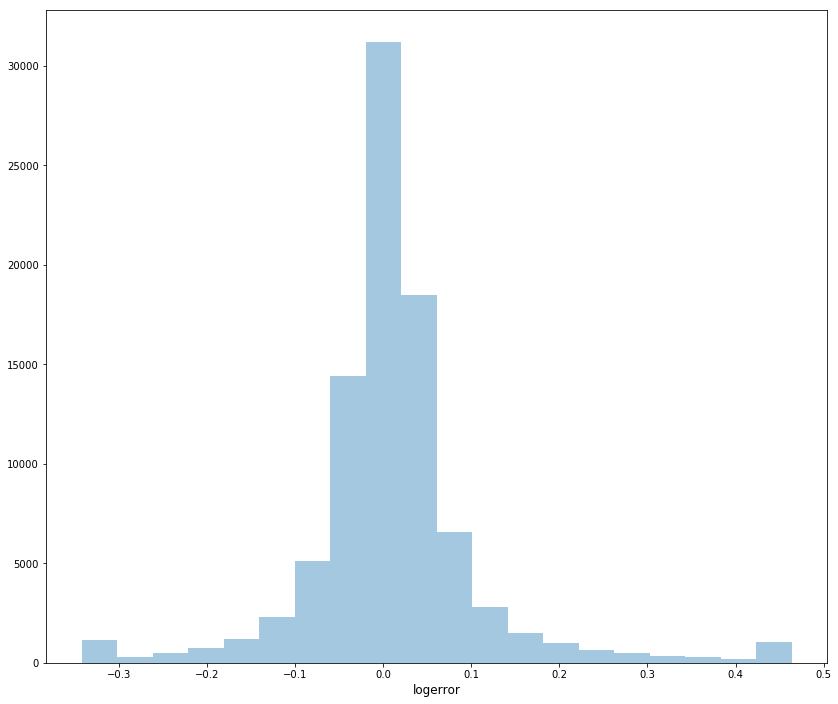

In [150]:


print("\n \n HISTOGRAM ")
plt.figure(figsize=(14, 12))
sns.distplot(dataframe_train.logerror.values, bins = 20, kde = False)
plt.xlabel('logerror', fontsize = 12)
plt.show()



 HISTOGRAM 


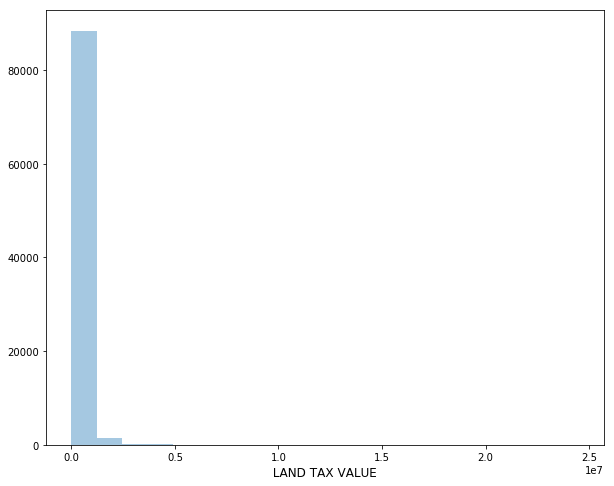

In [152]:
print()
print()
print(" HISTOGRAM ")
plt.figure(figsize=(10, 8))
sns.distplot(dataframe_train.landtaxvaluedollarcnt.values, bins = 20, kde = False)
plt.xlabel(' LAND TAX VALUE ', fontsize = 12)
plt.show()
me = dataframe_train.taxamount.mean()
#print("mean : ", me)

LINEAR REGRESSION

In [153]:

samp_data = pd.read_csv( sample_url , low_memory = False )  
train_data = pd.read_csv( train_url , low_memory = False )   
properties_data = pd.read_csv( properties_url , low_memory = False )  

properties_data.fillna(-1,inplace = True)

train_data = train_data.loc[:,['parcelid','logerror']].merge(properties_data, how='left',left_on='parcelid',right_on='parcelid')
 
    
length = len(train_data)
msk = np.random.rand(length) < 0.80

train = train_data[msk]
train_y = np.asarray(train['logerror' ] , dtype = "|S6")
train_x = train.drop(['parcelid' ,'logerror'] , axis = 1, inplace = False)

test_data = train_data[~msk]
test_y = test_data['logerror']
test_x = test_data.drop(['parcelid','logerror'], axis=1 , inplace = False)


model = linear_model.LinearRegression().fit(train_x, train_y)

pred_y = model.predict(test_x)

print("Mean-squared error: %.2f"
      % mean_squared_error(test_y, pred_y))
print('Variance: %.2f' % r2_score(test_y, pred_y))

Part 3 : Linear Regression
Mean-squared error: 0.02
Variance score: 0.00
*********************
